matrix:  [[4, 2, 1, 1, 2], [2, 4, 3, 1, 1], [1, 3, 5, 3, 2], [1, 1, 3, 4, 2], [2, 1, 2, 2, 4]] 

thresh:  [[1, 0, 0, 0, 0], [0, 1, 1, 0, 0], [0, 1, 1, 1, 0], [0, 0, 1, 1, 0], [0, 0, 0, 0, 1]]
communities:  [{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}]


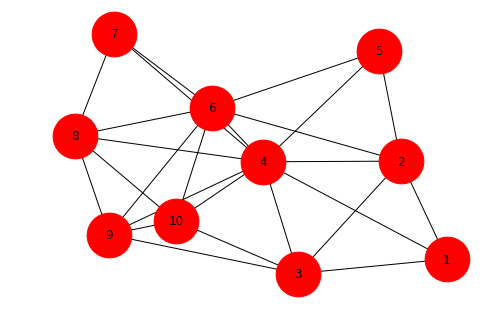

In [12]:
# Implement k-clique communities detection algorithm. The algorithm should
# receive a network and parameter k (size of clique) are return the communities.
import networkx as nx
import itertools

def initArray(n):
    array = []
    for i in range (0, n):
        array.append(0)
    return array

def k_clique_communities(G, k):
    cliques=list(nx.find_cliques(G))
    num_of_cliques = len(cliques)
    #build a matrix
    matrix = []
    for clique_i in cliques:
        col = 0
        matrix_row = initArray(num_of_cliques)
        for clique_j in cliques:
            sharedNodes = 0
            for node_i in clique_i:
                for node_j in clique_j:
                    if node_i == node_j :
                        sharedNodes += 1
            matrix_row[col] = sharedNodes
            col += 1
        matrix.append(matrix_row)

    
#threshold the matrix
    thresh_matrix = []
    for i in range (0, num_of_cliques):
        thresh_row = []
        for j in range (0, num_of_cliques):
            #print("i,j = ", i,j, "matrix[i,j] = ", matrix[i][j])
            if i == j:
                if matrix[i][j] >= k:
                    thresh_row.append(1)
                else:
                    thresh_row.append(0)
            else:
                if matrix[i][j] >= k-1:
                    thresh_row.append(1)
                else:
                    thresh_row.append(0)
        thresh_matrix.append(thresh_row)
    
    print("matrix: ", matrix, "\n")
    print("thresh: ", thresh_matrix)

    #return the communities:
    M = nx.Graph()
    communities = []
    for i in range (0, num_of_cliques):
        for j in range (i, num_of_cliques):
            #print("thresh_matrix[i][j] = ", thresh_matrix[i][j])
            if thresh_matrix[i][j] == 1:
                for node_1 in cliques[i]:
                    M.add_node(node_1)
                    for node_2 in cliques[i]:
                        M.add_edge(node_1, node_2)

                        
    
    
    #nx.draw(M, node_color = color_map, with_labels = True, node_size=2000)
    return list(nx.connected_components(M))





G=nx.Graph()
people = {"1", "2", "3", "4", "5", "6", "7", "8", "9", "10"}

G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(1, 4)
G.add_edge(2, 4)
G.add_edge(2, 3)
G.add_edge(2, 5)
G.add_edge(2, 6)
G.add_edge(3, 10)
G.add_edge(3, 9)
G.add_edge(3, 4)
G.add_edge(4, 6)
G.add_edge(4, 7)
G.add_edge(4, 8)
G.add_edge(4, 9)
G.add_edge(4, 10)
G.add_edge(5, 6)
G.add_edge(6, 7)
G.add_edge(6, 8)
G.add_edge(6, 9)
G.add_edge(6, 10)
G.add_edge(7, 8)
G.add_edge(8, 9)
G.add_edge(8,10)
G.add_edge(9, 10)
    
with open("communities.txt") as file:
    G1 = nx.Graph()
    lines = [line.rstrip('\n') for line in file]
    for line in lines:
        edge = str(line).split(' ')
        #print (edge)
        G.add_edge(edge[0], edge[1])
    plt.figure(3,figsize=(10,10))
    pos = nx.circular_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=1000, node_color="skyblue", font_size=15)    

nx.draw(G, with_labels = True, node_size=2000)
print("communities: ", k_clique_communities(G, 4))           